In [254]:
%pylab inline

import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/'

Populating the interactive namespace from numpy and matplotlib


In [255]:
def main():
    
    means = [10**-5, 10**-4, 10**-3] #, 10**-2
    pers = [2,3,4]
    per = 4
    list_of_s = []
    #diff_min = []
    #diff_max = []
    errors = []
    #x_axis_labels = []
    legend_labels = []
    
    #i = 0
    for mean in means:
        #for per in pers:
        for j in range(0,3):
            if per == 4 and mean == 10**-2:
                per = 3
                file_list = glob.glob('./results/validation_multiple/fig2c/per_%d*_%.5f.txt'%(per, mean)) # narrow_prior 
                #print('./results/validation_multiple/fig2c/per_%d*_%.5f.txt'%(per, mean))
                filename = file_list[1]
                print(filename)
            else:
                file_list = glob.glob('./results/validation_multiple/fig2c/per_%d*_%.5f.txt'%(per, mean)) # narrow_prior 
                #print('./results/validation_multiple/fig2c/per_%d*_%.5f.txt'%(per, mean))
                if len(file_list) == 3:
                    filename = file_list[j] #i
                else:
                    filename = file_list[0]
            allele_freqs_file = open(filename, 'r')
            lines = allele_freqs_file.readlines()

            line = lines[4]       
            info = line.strip().split(': ')
            est_mean = float(info[1])
            list_of_s.append(est_mean)
            line = lines[5]       
            info = line.strip().split(': ')
            stdev = float(info[1])
            line = lines[1]
            info = line.strip().split(' ')
            #print(info)
            k = float(info[7])
            theta = float(info[10])
            #i = i + 1
            #x_axis_labels.append(r"$k_{%d}, \Theta_{%d}"%(i,i))
            #x_axis_labels.append(r"$k_{%d},\Theta_{%d}$"%(i,i))
            legend_labels.append('(%.1E,%.1E)'%(k,theta))
            #diff_min.append(est_mean - stdev)
            #diff_max.append(est_mean + stdev)
            errors.append(stdev)
        #x_axis_labels.append('\n\nmean')
            
    plt.figure(1, figsize=(12, 6))
    #x_axis_labels = ['10^-5','10^-5','10^-5','10^-4','10^-4','10^-4','10^-3','10^-3','10^-3','10^-2','10^-2','10^-2']
    y_pos = np.arange(len(legend_labels))
    
    plt.errorbar(y_pos[0:3], list_of_s[0:3], yerr=errors[0:3], marker = 'o', ls = '--', c='red') # [diff_min[0:3],diff_max[0:3]]
    plt.errorbar(y_pos[3:6], list_of_s[3:6], yerr=errors[3:6], marker = 'o', ls = '--', c='red') # [diff_min[3:6],diff_max[3:6]]
    plt.errorbar(y_pos[6:9], list_of_s[6:9], yerr=errors[6:9], marker = 'o', ls = '--', c='red') # [diff_min[6:9],diff_max[6:9]]
    #plt.errorbar(y_pos[9:10], list_of_s[9:10], yerr=errors[9:10], marker = 'o', ls = '--', c='red') # [diff_min[9:12],diff_max[9:12]]
    plt.xticks(y_pos[0:9], legend_labels[0:9], rotation = 35) #x_axis_labels
    plt.yscale('log')
    plt.ylabel("Estimated s")
    plt.axvline(x=2.5, linestyle = '--')
    plt.axvline(x=5.5, linestyle = '--')
    #plt.axvline(x=8.5, linestyle = '--')
    plt.text(0.7,10**-7.3,r'$s=10^{-5}$')
    plt.text(3.7,10**-7.3,r'$s=10^{-4}$')
    plt.text(6.7,10**-7.3,r'$s=10^{-3}$')
    #plt.text(8.8,10**-7.3,r'$s=10^{-2}$')
    plt.ylim(10**-6, 10**-1)
    plt.title('Joint method validation: Period 4\nMean +/- 1 st dev of 200 median estimates')
    plt.savefig(PLOTDIR + 'per_4_mult_sims.pdf',bbox_inches='tight')
    #plt.legend(x_axis_labels, legend_labels)
    plt.show()

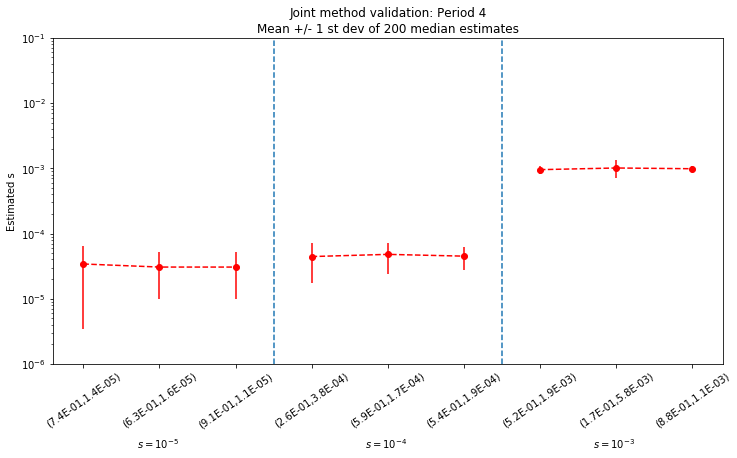

CPU times: user 1.98 s, sys: 43 ms, total: 2.02 s
Wall time: 2.02 s


In [256]:
%%time
if __name__ == '__main__':
    main()